In [19]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [2]:
import numpy as np
from qiskit import *
%matplotlib inline

In [27]:
# Create a Quantum Circuit acting on a quantum register of a one qubit
circ = QuantumCircuit(1)

In [28]:
circ.x(0)
circ.x(0)
circ.x(0)
circ.x(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)

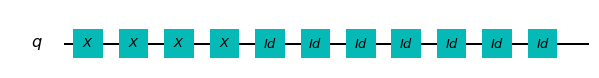

In [29]:
circ.draw()

In [33]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[1.+0.j 0.+0.j]


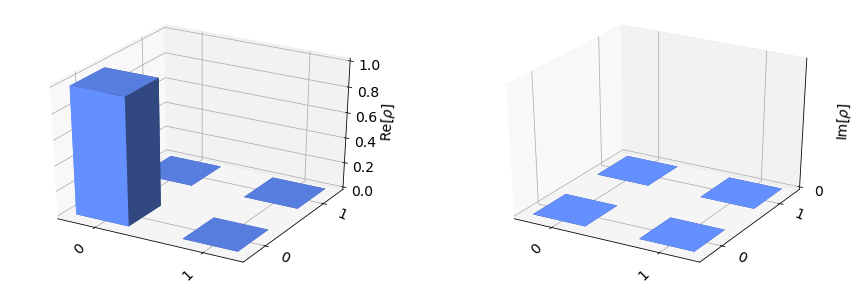

In [34]:
plot_state_city(outputstate)

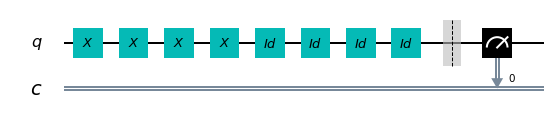

In [13]:
# Create a Quantum Circuit
meas = QuantumCircuit(1, 1)
meas.barrier(range(1))
# map the quantum measurement to the classical bits
meas.measure(range(1),range(1))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

In [14]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [15]:
counts = result_sim.get_counts(qc)
print(counts)

{'0': 1024}


In [22]:
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_burlington')
job_exp = execute(qc, backend=backend)

Credentials are already in use. The existing account in the session will be replaced.


In [23]:
job_monitor(job_exp)

Job Status: job has successfully run


In [24]:
result_exp = job_exp.result()

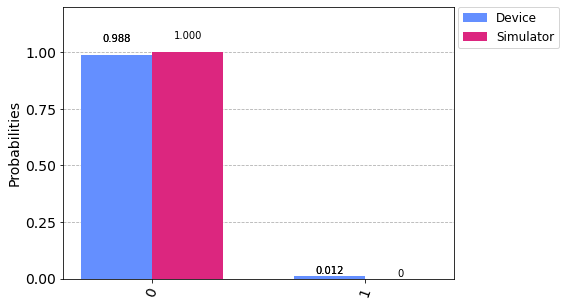

In [26]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

```W przedstawionym przykładzie możemy zaobserwować DEKOHERENCJĘ. Użyłam 4 bramek X i 7 bramek ID. Zaczynamy od stanu zerowego, następnie parzysta ilość bramek X powinny spowodować, że nadal stan naszego układu to 0, a bramki ID (w teorii) nie powinny zmienić stanu. Wynik z "Simulator" jest zawsze 0, jednak nie 100% pomiarów z "Device" to stan 0. Jest to spowodowane tym, że na prawdziwym komputerze kwantowym każda z bramek ID generuje błąd.```